In [ ]:
pip install fastai annoy gdown gradio==4.44.0 kaggle


In [2]:
import json, os

kaggle_credentials={
    "username":"PROJECT1",
    "key": "KGAT_f9e3899f45e58773299e363c1f835875"
}
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_credentials, f)
!chmod 600 /root/.kaggle/kaggle.json

print("kaggle.json created successfully!")


kaggle.json created successfully!


In [3]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT
 99% 557M/565M [00:01<00:00, 312MB/s]
100% 565M/565M [00:01<00:00, 418MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("fashion-product-images-small.zip","r") as z:
    z.extractall("fashion_data")

print("Dataset extracted!")


Dataset extracted!


In [5]:
import pandas as pd
csv_path="fashion_data/styles.csv"
df=pd.read_csv(csv_path,on_bad_lines="skip")
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [7]:
df[["id","masterCategory","subCategory","articleType"]].head(20)

,id,masterCategory,subCategory,articleType
0,15970,Apparel,Topwear,Shirts
1,39386,Apparel,Bottomwear,Jeans
2,59263,Accessories,Watches,Watches
3,21379,Apparel,Bottomwear,Track Pants
4,53759,Apparel,Topwear,Tshirts
5,1855,Apparel,Topwear,Tshirts
6,30805,Apparel,Topwear,Shirts
7,26960,Apparel,Topwear,Shirts
8,29114,Accessories,Socks,Socks
9,30039,Accessories,Watches,Watches


In [8]:
df["subCategory"].value_counts()

,count
subCategory,
Topwear,15402
Shoes,7343
Bags,3055
Bottomwear,2694
Watches,2542
Innerwear,1808
Jewellery,1079
Eyewear,1073
Fragrance,1011


In [9]:
import os
img_folder="fashion_data/images/"
df["img_path"]=img_folder+df["id"].astype(str)+".jpg"
df=df[df["img_path"].apply(os.path.exists)]
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,img_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,fashion_data/images/15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,fashion_data/images/39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,fashion_data/images/59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,fashion_data/images/21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,fashion_data/images/53759.jpg


In [10]:
df=df[["img_path","subCategory"]]
df.head()

,img_path,subCategory
0,fashion_data/images/15970.jpg,Topwear
1,fashion_data/images/39386.jpg,Bottomwear
2,fashion_data/images/59263.jpg,Watches
3,fashion_data/images/21379.jpg,Bottomwear
4,fashion_data/images/53759.jpg,Topwear


In [11]:
df[["subCategory"]]

,subCategory
0,Topwear
1,Bottomwear
2,Watches
3,Bottomwear
4,Topwear
...,...
44419,Shoes
44420,Flip Flops
44421,Topwear
44422,Fragrance


In [12]:
df[["subCategory"]].value_counts

<bound method DataFrame.value_counts of       subCategory
0         Topwear
1      Bottomwear
2         Watches
3      Bottomwear
4         Topwear
...           ...
44419       Shoes
44420  Flip Flops
44421     Topwear
44422   Fragrance
44423     Watches

[44419 rows x 1 columns]>

In [13]:
df[["subCategory"]].value_counts()


,count
subCategory,
Topwear,15398
Shoes,7343
Bags,3055
Bottomwear,2693
Watches,2542
Innerwear,1808
Jewellery,1079
Eyewear,1073
Fragrance,1011


In [14]:
df["subCategory"].isna()

,subCategory
0,False
1,False
2,False
3,False
4,False
...,...
44419,False
44420,False
44421,False
44422,False


In [15]:
df["subCategory"].isna().sum()

np.int64(0)

In [16]:
df[df["subCategory"].isna()]

,img_path,subCategory


In [17]:
df=df.dropna(subset=["subCategory"])
df.head()

,img_path,subCategory
0,fashion_data/images/15970.jpg,Topwear
1,fashion_data/images/39386.jpg,Bottomwear
2,fashion_data/images/59263.jpg,Watches
3,fashion_data/images/21379.jpg,Bottomwear
4,fashion_data/images/53759.jpg,Topwear


In [18]:
df["subCategory"].value_counts()

,count
subCategory,
Topwear,15398
Shoes,7343
Bags,3055
Bottomwear,2693
Watches,2542
Innerwear,1808
Jewellery,1079
Eyewear,1073
Fragrance,1011


In [19]:
count=df["subCategory"].value_counts()
valid_categories=count[count>=100].index.tolist()
df=df[df["subCategory"].isin(valid_categories)]
df.head()

,img_path,subCategory
0,fashion_data/images/15970.jpg,Topwear
1,fashion_data/images/39386.jpg,Bottomwear
2,fashion_data/images/59263.jpg,Watches
3,fashion_data/images/21379.jpg,Bottomwear
4,fashion_data/images/53759.jpg,Topwear


In [20]:
from fastai.vision.all import*

In [21]:
dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),get_x=ColReader("img_path"),get_y=ColReader("subCategory"),splitter=RandomSplitter(valid_pct=0.2,seed=42),item_tfms=Resize(224))

In [22]:
dls=dblock.dataloaders(df,bs=64)

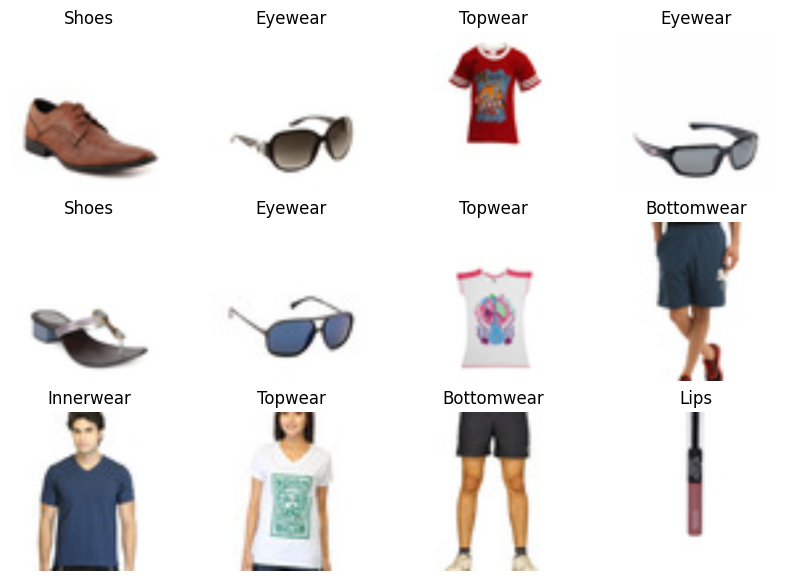

In [23]:
dls.show_batch(max_n=12,figsize=(10,7))

In [24]:
learn=vision_learner(dls,resnet18,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


SuggestedLRs(valley=0.0010000000474974513)

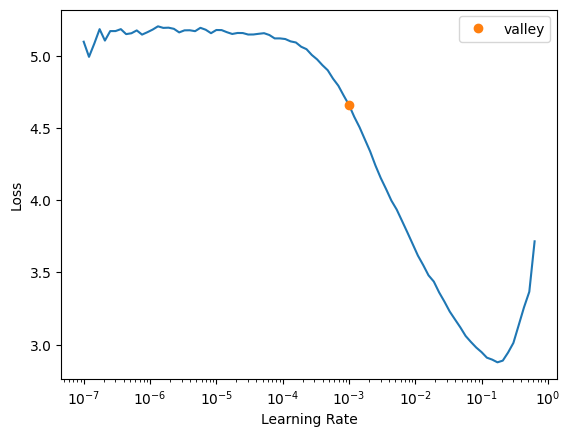

In [25]:
learn.lr_find()

In [26]:
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)


(True, 'Tesla T4')

In [27]:
learn.fine_tune(3,base_lr=1.2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.479059,0.296271,0.917444,01:42


epoch,train_loss,valid_loss,accuracy,time
0,0.278719,0.190884,0.948260,02:04
1,0.165554,0.136030,0.963839,02:05
2,0.102740,0.128668,0.963498,02:04


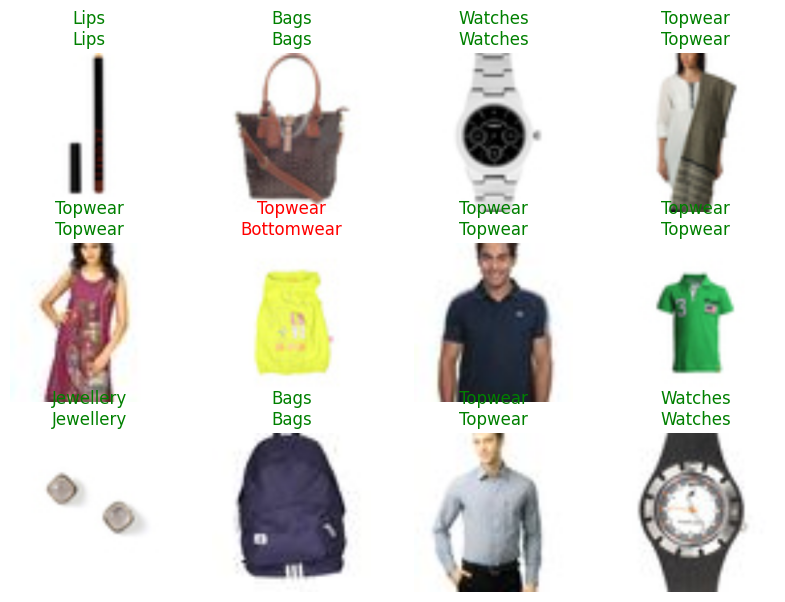

In [28]:
learn.show_results(max_n=12,figsize=(10,7))

In [29]:
import torch
penultimate=learn.model[1][-2]

class FeatureHook:
  def __init__(self,module):
    self.features=[]
    self.hook=module.register_forward_hook(self.hook_fn)

  def hook_fn(self,module,inp,out):
    x=out.detach().cpu()
    if x.ndim>2:
      x=x.mean(dim=[2,3])
    self.features.append(x)

  def close(self):
      self.hook.remove()
  def get_features(self):
      return torch.cat(self.features,dim=0)

In [30]:
all_paths=df["img_path"].tolist()
all_dl=dls.test_dl(all_paths,with_labels=False)
hook=FeatureHook(penultimate)
learn.model.eval()
device=learn.dls.device

with torch.no_grad():
  for batch in all_dl:
    imgs=batch[0].to(device)
    _=learn.model(imgs)
emb_tensor=hook.get_features()
hook.close()

embeddings=emb_tensor.numpy()
embeddings.shape


(43974, 512)

In [31]:
!pip install annoy

In [32]:
from annoy import AnnoyIndex

embedding_dim=embeddings.shape[1]
ann_index=AnnoyIndex(embedding_dim,metric='euclidean')
for i,vector in enumerate(embeddings):
  ann_index.add_item(i,vector)
ann_index.build(10)
ann_index.save("fashion_annoy.ann")

True

In [33]:
'''def show_similar(idx,n=5):
  print(f"Query image index:{idx}")
  neighbors=ann_index.get_nns_by_item(idx,n+1)[1:]

  print("Query image:")
  display(Image.open(df.iloc[idx]["img_path"]).resize((200,200)))

  print("\nSimilar item:")
  for i in neighbors:
    display(Image.open(df.iloc[i]["img_path"]).resize((200,200)))'''

'def show_similar(idx,n=5):\n  print(f"Query image index:{idx}")\n  neighbors=ann_index.get_nns_by_item(idx,n+1)[1:]\n\n  print("Query image:")\n  display(Image.open(df.iloc[idx]["img_path"]).resize((200,200)))\n\n  print("\nSimilar item:")\n  for i in neighbors:\n    display(Image.open(df.iloc[i]["img_path"]).resize((200,200)))'

In [34]:
'''show_similar(122,n=10)'''

'show_similar(122,n=10)'

In [35]:
from collections import defaultdict
category_to_indices=defaultdict(list)
for i,row in df.iterrows():
  cat=row["subCategory"]
  category_to_indices[cat].append(i)

In [36]:
def show_similar_filtered(idx,n=5):
  query_cat=df.iloc[idx]["subCategory"]
  print(f"Query image (Category:{query_cat}):")
  display(Image.open(df.iloc[idx]["img_path"]).resize((200,200)))
  candidates=category_to_indices[query_cat]
  neighbors=ann_index.get_nns_by_item(idx,50)
  filtered=[i for i in neighbors if i in candidates and i!=idx]
  if len(filtered)<n:
    print("/n Not enough same-category items,showing closest overall match instead:")
    filtered=[i for i in neighbors if i!=idx][:n]
  else:
    print("/nSimilar items in Same Category:")
  for i in filtered[:n]:
    display(Image.open(df.iloc[i]["img_path"]).resize((250,250)))

Query image (Category:Shoes):


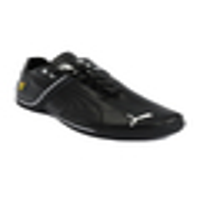

/nSimilar items in Same Category:


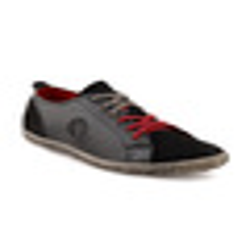

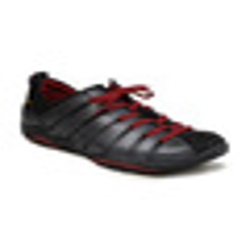

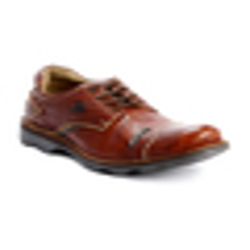

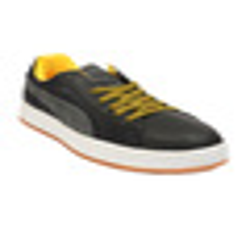

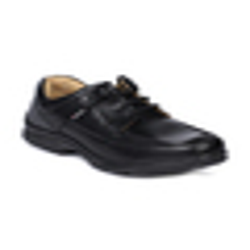

In [37]:
show_similar_filtered(10, n=5)

In [38]:
query_cat=df.iloc[10]["subCategory"]
print(query_cat)
category_to_indices[query_cat]

Shoes


[10,
 25,
 33,
 34,
 41,
 45,
 51,
 54,
 64,
 65,
 67,
 69,
 71,
 76,
 77,
 89,
 102,
 103,
 105,
 108,
 109,
 112,
 121,
 127,
 143,
 147,
 148,
 153,
 155,
 162,
 163,
 170,
 176,
 178,
 181,
 190,
 201,
 205,
 216,
 219,
 225,
 230,
 231,
 239,
 242,
 250,
 252,
 256,
 260,
 263,
 270,
 282,
 307,
 323,
 331,
 334,
 337,
 348,
 368,
 372,
 378,
 387,
 388,
 399,
 405,
 408,
 419,
 446,
 448,
 453,
 454,
 455,
 469,
 473,
 477,
 495,
 497,
 502,
 512,
 518,
 527,
 546,
 550,
 560,
 562,
 563,
 571,
 572,
 575,
 578,
 589,
 600,
 601,
 609,
 619,
 627,
 642,
 643,
 650,
 653,
 655,
 662,
 665,
 668,
 673,
 680,
 683,
 701,
 705,
 709,
 717,
 728,
 739,
 749,
 756,
 757,
 761,
 766,
 790,
 795,
 796,
 803,
 815,
 821,
 825,
 829,
 830,
 840,
 842,
 849,
 850,
 853,
 855,
 859,
 865,
 876,
 883,
 887,
 889,
 890,
 898,
 920,
 927,
 930,
 931,
 932,
 941,
 947,
 949,
 951,
 952,
 957,
 960,
 964,
 965,
 968,
 970,
 973,
 978,
 979,
 985,
 987,
 990,
 1002,
 1005,
 1006,
 1018,
 1019,
 10

In [39]:
def get_embedding_for_indices(indices):
  return embeddings[indices]

In [40]:
def vibe_match(indices,n=5):
  print("Selected images for vibes:")
  for idx in indices:
    display(Image.open(df.iloc[idx]["img_path"]).resize((200,200)))
  selected_embs=embeddings[indices]
  vibe_vector=selected_embs.mean(axis=0)
  neighbors=ann_index.get_nns_by_vector(vibe_vector,50)
  neighbors=[i for i in neighbors if i not in indices]
  print("\nRecommended items matching the combined vibe:")
  for i in neighbors[:n]:
    display(Image.open(df.iloc[i]["img_path"]).resize((200,200)))

Selected images for vibes:


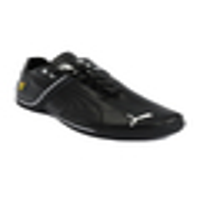

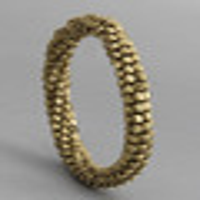

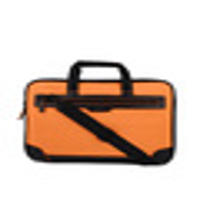


Recommended items matching the combined vibe:


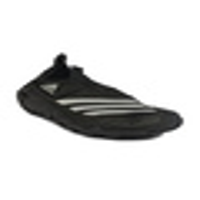

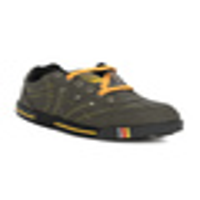

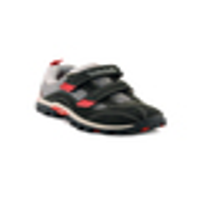

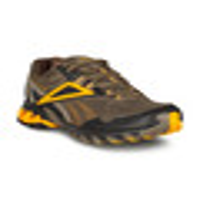

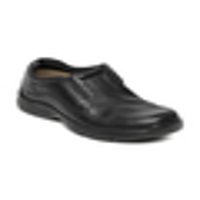

In [41]:
vibe_match([10, 25, 87], n=5)

In [42]:
!pip install gradio --quiet

In [43]:
from PIL import Image

def get_sim_img(idx,n=5):
  query_cat=df.iloc[idx]["subCategory"]
  query_path=df.iloc[idx]["img_path"]

  candidates=category_to_indices[query_cat]
  neighbors=ann_index.get_nns_by_item(idx,200)

  filtered=[i for i in neighbors if i in candidates and i!=idx]

  if len(filtered)<n:
    filtered=[i for i in neighbors if i!=idx][:n]
    title=f"not enough in'{query_cat}',showing closest overall"
  else:
    filtered=filtered[:n]
    title=f"Similar items in category '{query_cat}'"

  query_img=Image.open(query_path).resize((250,250))
  sim_imgs=[Image.open(df.iloc[i]["img_path"]).resize((250,250)) for i in filtered]

  return title,query_img,sim_imgs

In [44]:
def search_by_text(text):
  text=text.lower().strip()
  text_clean=text.replace("-","").replace(" ","").replace("_","")
  results=[]
  for idx, cat in df["subCategory"].items():
    cat_clean = cat.lower().replace("-", "").replace(" ", "").replace("_", "")
    if text_clean in cat_clean:
      results.append(idx)
  return results
def recom_from_text(text,n=5):
  idx_list=search_by_text(text)
  if len(idx_list)==0:
    return f"No matches found for '{text}'",None,[]
  first_idx=idx_list[0]
  return get_sim_img(first_idx,n)

In [45]:
from PIL import Image
from fastai.vision.all import *

def embed_uploaded_image(pil_img):
  img=PILImage.create(pil_img)
  dl=learn.dls.test_dl([img])
  device=learn.dls.device
  with torch.no_grad():
    xb,=dl.one_batch()
    feats=learn.model(xb.to(device)).detach().cpu()
  if(feats.ndim>2):
    feats=feats.mean(dim=[2,3])
  return feats.squeeze().numpy()


def recom_from_upload(pil_img,n=5):
  vec=embed_uploaded_image(pil_img)
  neighbors=ann_index.get_nns_by_vector(vec,50)

  results=neighbors[:n]
  sim_imgs=[Image.open(df.iloc[i]["img_path"]).resize((250,250)) for i in results]
  gallery=[(img,f"Similar #{i+1}") for i,img in enumerate(sim_imgs)]

  return "Similar items for uploaded image:",pil_img,gallery

In [47]:
import gradio as gr
from PIL import Image

def gradio_recom(idx,n):
    title,query_img,sim_imgs=get_sim_img(int(idx),int(n))
    gallery=[(img,f"Similar #{i+1}") for i,img in enumerate(sim_imgs)]
    return title,query_img,gallery

index_tab=gr.Interface(
    fn=gradio_recom,
    inputs=[
        gr.Slider(0,len(df)-1,value=10,step=1,label="Image Index"),
        gr.Slider(1,12,value=5,step=1,label="Number of Recommendations")
    ],
    outputs=[
        gr.Textbox(label="Info"),
        gr.Image(label="Query Image"),
        gr.Gallery(label="Recommended Items",columns=4,height="400px")
    ],
    title="Search by Index"
)

def gradio_recom_text(text,n):
    title,query_img,sim_imgs=recom_from_text(text,n)
    gallery=[(img,f"Match #{i+1}") for i,img in enumerate(sim_imgs)]
    return title,query_img,gallery

text_tab=gr.Interface(
    fn=gradio_recom_text,
    inputs=[
        gr.Textbox(label="Enter Category"),
        gr.Slider(1,12,value=5,step=1,label="Number of Recommendations")
    ],
    outputs=[
        gr.Textbox(label="Info"),
        gr.Image(label="Representative Image"),
        gr.Gallery(label="Recommendation Items",columns=4,height="400px")
    ],
    title="Search by Text"
)

def gradio_recom_upload(img,n):
    title,uploaded_img,sim_imgs=recom_from_upload(img,n)
    return title,uploaded_img,sim_imgs

upload_tab=gr.Interface(
    fn=gradio_recom_upload,
    inputs=[
        gr.Image(type="pil",label="Upload an Image"),
        gr.Slider(1,12,value=5,step=1,label="Number of Recommendations")
    ],
    outputs=[
        gr.Textbox(label="Info"),
        gr.Image(label="Uploaded Image"),
        gr.Gallery(label="Recommendation Items",columns=4,height="400px")
    ],
    title="Search by Image Upload"
)

demo=gr.TabbedInterface(
    [index_tab,text_tab,upload_tab],
    ["By Index","By Text","By Image Upload"]
)

demo.launch(debug=True)


/usr/local/lib/python3.12/dist-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).



ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Running on public URL: https://76057300cec69446c8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Streaming output truncated to the last 5000 lines.
               ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/routing.py", line 387, in app
    raw_response = await run_endpoint_function(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/routing.py", line 290, in run_endpoint_function
    return await run_in_threadpool(dependant.call, **values)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/starlette/concurrency.py", line 38, in run_in_threadpool
    return await anyio.to_thread.run_sync(func)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/anyio/_backends/_asyncio.py", line 2485, i

KeyboardInterrupt: 